In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from matplotlib import cm
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
sns.set_style('white')

In [2]:
data = pd.read_csv(r'Olympics\athlete_events.csv')
regions = pd.read_csv(r"Olympics\noc_regions.csv")

In [3]:
data = data.merge(regions[["NOC","region"]],left_on="NOC",right_on="NOC",how = "left")

In [4]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 16 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
region    270746 non-null object
dtypes: float64(3), int64(2), object(11)
memory usage: 35.2+ MB


In [6]:
data.isnull().sum()/data.shape[0]*100

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.494445
Height    22.193821
Weight    23.191180
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.326207
region     0.136473
dtype: float64

In [7]:
# There are some missing values in columns : Age, Height, Weight, Medal

In [26]:
athletes_all = data.groupby('Year')['ID'].nunique().reset_index()
athletes = data.groupby(['Year','Season'])['ID'].nunique().reset_index()

In [27]:
athletes.head(3)

,Year,Season,ID
0,1896,Summer,176
1,1900,Summer,1224
2,1904,Summer,650


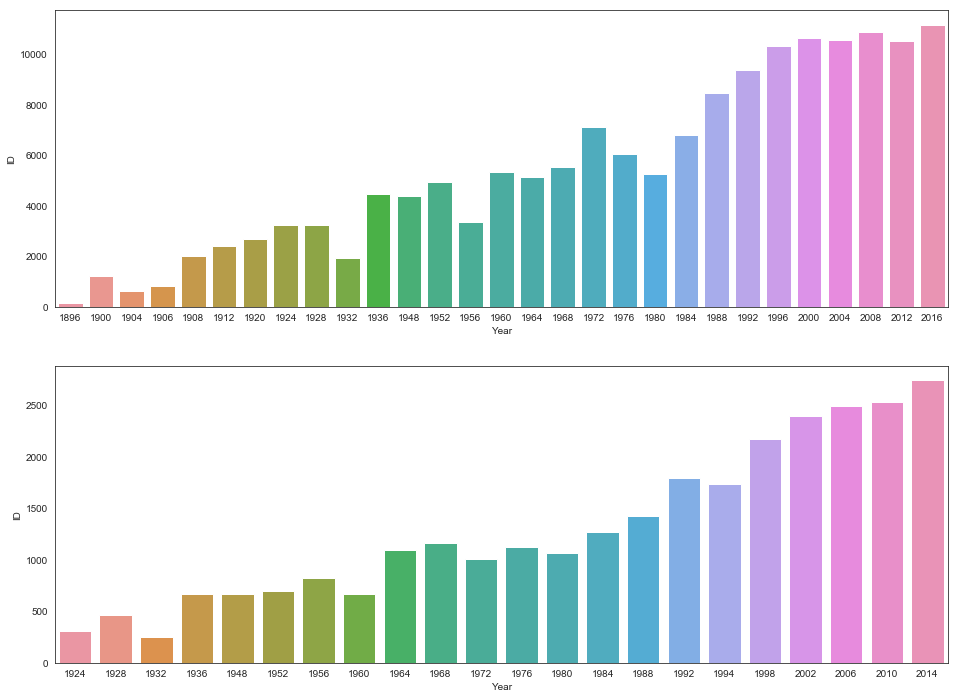

In [46]:
fig, ax = plt.subplots(2,1,figsize=(16,12))

sns.barplot(x='Year',y='ID',data=athletes[athletes['Season']=='Summer'],ax=ax[0])
sns.barplot(x='Year',y='ID',data=athletes[athletes['Season']=='Winter'],ax=ax[1])